## 4: WHAT WILL THEY SHOP?

1. Correlations types-categories?
2. Most bought categories?
3. Aggregate categories - regroup


1. Top 10 products & other graphs
2. Filters -- per day, per store...

### Import libraries 

In [2]:
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import dataframe_image as dfi

from matplotlib.ticker import StrMethodFormatter

# importing the required function for correlations
from scipy.stats import chi2_contingency

### Load and view data 

In [101]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# del df["HH"]
df.describe(include='all')

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,storetype_num,storename_num,cat_num,time_num,datetime,timestamp,dates,times,times_min,dates_days
count,372.000000,372.000000,372,372.000000,372.000000,372.000000,372,372,372,372,...,372.000000,372.000000,372.000000,372.000000,372,3.720000e+02,372,372,372.000000,3.720000e+02
unique,NaN,NaN,314,NaN,NaN,NaN,139,16,7,4,...,NaN,NaN,NaN,NaN,40,NaN,26,35,NaN,NaN
top,NaN,NaN,GROF BROOD GESN.,NaN,NaN,NaN,charcuterie,fruit & vegetables,Saturday,morning,...,NaN,NaN,NaN,NaN,2021-11-26 17:25:00,NaN,2022-01-08,17:25:00,NaN,NaN
freq,NaN,NaN,6,NaN,NaN,NaN,25,103,87,186,...,NaN,NaN,NaN,NaN,44,NaN,45,44,NaN,NaN
mean,4.043011,18.881720,NaN,1.274194,2.602328,2.867247,NaN,NaN,NaN,NaN,...,3.392473,4.212366,7.462366,1.387097,NaN,1.639888e+18,NaN,NaN,1353.930108,2.021425e+07
std,2.478648,10.908193,NaN,1.103819,1.947725,2.019200,NaN,NaN,NaN,NaN,...,1.344550,2.396214,4.079557,0.896621,NaN,1.924092e+15,NaN,NaN,371.187009,4.252837e+03
min,1.000000,1.000000,NaN,1.000000,0.064680,0.064680,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.637435e+18,NaN,NaN,802.000000,2.021112e+07
25%,1.000000,8.000000,NaN,1.000000,1.300000,1.543970,NaN,NaN,NaN,NaN,...,4.000000,3.000000,6.000000,1.000000,NaN,1.637948e+18,NaN,NaN,1055.000000,2.021113e+07
50%,4.000000,20.000000,NaN,1.000000,2.240250,2.462860,NaN,NaN,NaN,NaN,...,4.000000,4.000000,9.000000,2.000000,NaN,1.639306e+18,NaN,NaN,1179.500000,2.021121e+07
75%,6.000000,26.250000,NaN,1.000000,3.290000,3.875000,NaN,NaN,NaN,NaN,...,4.000000,6.000000,11.000000,2.000000,NaN,1.641640e+18,NaN,NaN,1725.000000,2.022011e+07


#### We know they will shop on WEDNESDAY, and in A SUPERMARKET (Albert Heijn)

In [16]:
# to select only one day
day = 'Wednesday'
store = 'supermarket'
storename = 'Albert Heijn'

# select only these data (for day, store, store name)
# df= df[df["day"] == day]
# df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]


In [76]:
# we could also limit the data to only the orders
df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

## 1. Correlations - TIME

In [17]:
# use the corr function to display the correlation between all the features
data_corr = df.corr()
data_corr

,week,order_ID,amount,price_unit,price_total,promo,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,cat_num,time_num,timestamp,times_min,dates_days
week,1.000000,0.996965,-0.216612,0.222491,0.085226,-0.359211,0.538816,0.977228,0.706927,-0.332663,-0.165220,NaN,0.359211,-0.359211,0.738350,0.454369,0.997110,0.421946,0.952418
order_ID,0.996965,1.000000,-0.235611,0.262721,0.122312,-0.289669,0.532183,0.982526,0.707149,-0.362754,-0.154960,NaN,0.390716,-0.390716,0.732811,0.513394,0.992847,0.461993,0.943825
amount,-0.216612,-0.235611,1.000000,-0.656199,-0.002792,-0.301511,0.301511,-0.316657,-0.368301,0.599319,0.400451,NaN,-0.603023,0.603023,-0.381385,-0.476731,-0.222334,-0.588314,-0.225620
price_unit,0.222491,0.262721,-0.656199,1.000000,0.746654,0.592671,-0.349773,0.397711,0.684586,-0.896275,-0.730961,NaN,0.861478,-0.861478,0.646749,0.655966,0.199105,0.803155,0.110728
price_total,0.085226,0.122312,-0.002792,0.746654,1.000000,0.523126,-0.175918,0.228709,0.587215,-0.637029,-0.614465,NaN,0.583308,-0.583308,0.514580,0.425279,0.045647,0.515748,-0.084214
promo,-0.359211,-0.289669,-0.301511,0.592671,0.523126,1.000000,-0.500000,-0.208635,-0.058168,-0.496929,-0.076885,NaN,0.500000,-0.500000,-0.158114,0.632456,-0.365697,0.540881,-0.383021
reorder,0.538816,0.532183,0.301511,-0.349773,-0.175918,-0.500000,1.000000,0.410995,0.058168,0.496929,0.383066,NaN,-0.500000,0.500000,0.158114,-0.158114,0.503387,-0.419562,0.383908
item_id,0.977228,0.982526,-0.316657,0.397711,0.228709,-0.208635,0.410995,1.000000,0.807226,-0.507222,-0.309071,NaN,0.526293,-0.526293,0.820981,0.567494,0.971351,0.572835,0.916316
type_id,0.706927,0.707149,-0.368301,0.684586,0.587215,-0.058168,0.058168,0.807226,1.000000,-0.750658,-0.788406,NaN,0.717399,-0.717399,0.981023,0.435329,0.684798,0.644058,0.588491
order_amount,-0.332663,-0.362754,0.599319,-0.896275,-0.637029,-0.496929,0.496929,-0.507222,-0.750658,1.000000,0.733764,NaN,-0.993859,0.993859,-0.671429,-0.742857,-0.335323,-0.949407,-0.321263


### CORRELATION 1: categories vs day

In [66]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
category,,,,,,,
bakery,2,3,8,16,1,4,5
beverages,7,2,4,5,3,5,0
breakfast & spreads,0,1,1,1,3,2,0
canned foods,1,0,4,0,5,3,0
care & hyygiene,0,0,0,0,0,1,0
condiments,0,0,1,2,2,0,0
cooking aid,0,0,0,0,1,3,0
dairy & plant based,4,6,15,12,11,6,0
frozen foods,0,0,9,1,2,4,0


In [67]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## This is a strong correlation (significant), lets try to split it up more to see the intricacies per store name

The P-Value of the ChiSq Test is: 5.734698007999439e-05


Significant (strong), we could limit options to what's bought per day:
> 1. Certain cat. are bought on specific days only/mostly
2. Could be by chance, but could be on purpose for some categories (e.g. bakery)
3. >  Let's check if this is also true for only the supermarket

##### Let's try split up per day/store/storename

In [130]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
# df= df[df["day"] == day]
df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [131]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
category,,,,,,,
bakery,2,1,0,1,1,0,2
beverages,5,2,4,5,3,4,0
breakfast & spreads,0,1,1,1,3,2,0
canned foods,1,0,4,0,5,3,0
condiments,0,0,1,2,2,0,0
cooking aid,0,0,0,0,1,3,0
dairy & plant based,4,5,14,12,11,6,0
frozen foods,0,0,9,1,2,4,0
fruit & vegetables,23,10,24,21,12,9,4


In [132]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## This is a strong correlation (significant), lets try to split it up more to see the intricacies per store name

The P-Value of the ChiSq Test is: 0.0008093719555801397


Significant (strong) correlation, we could limit options to what's bought per day in a supermarket:
> 1. Could be that some items are bought mostly/exclusively on specific days
2. Could also be that some categories/items are specifically never bought on some days (e.g. wednesday)

### CORRELATION 2: category vs. time

In [20]:
# Cross tabulation
CrosstabResult=pd.crosstab(index=df['category'],columns=df['time'])
CrosstabResult

time,afternoon,evening,morning,noon
category,,,,
bakery,2,2,30,5
beverages,9,3,14,0
breakfast & spreads,1,4,2,1
canned foods,4,3,3,3
care & hyygiene,1,0,0,0
condiments,2,1,2,0
cooking aid,1,0,3,0
dairy & plant based,9,20,24,1
frozen foods,3,1,12,0


In [22]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## Big correlations here: certain categories are bought at different times

The P-Value of the ChiSq Test is: 0.0009275444607973967


##### Let's try split up per day/store/storename

In [133]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
# df= df[df["day"] == day]
df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [134]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['time'])
CrosstabResult

time,afternoon,evening,morning,noon
category,,,,
bakery,2,2,1,2
beverages,8,3,12,0
breakfast & spreads,1,4,2,1
canned foods,4,3,3,3
condiments,2,1,2,0
cooking aid,1,0,3,0
dairy & plant based,9,20,22,1
frozen foods,3,1,12,0
fruit & vegetables,29,21,44,9


In [135]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## This is a strong correlation (significant), lets try to split it up more to see the intricacies per store name

The P-Value of the ChiSq Test is: 0.03811345940657114


### CORRELATION 3: category vs. week

In [116]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")
# Cross tabulation
CrosstabResult=pd.crosstab(index=df['category'],columns=df['week'])
CrosstabResult

week,1,2,3,4,5,6,7,8
category,,,,,,,,
bakery,12,3,4,8,3,3,5,1
beverages,5,2,3,3,4,4,2,3
breakfast & spreads,2,1,2,0,1,0,1,1
canned foods,5,3,2,0,0,3,0,0
care & hyygiene,0,0,0,0,0,1,0,0
condiments,1,2,0,0,0,0,2,0
cooking aid,0,1,0,0,3,0,0,0
dairy & plant based,13,4,7,6,6,5,7,6
frozen foods,0,1,1,1,4,7,0,2


In [117]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## Big correlations here: certain categories are bought at different times

The P-Value of the ChiSq Test is: 0.017490778823717523


##### Let's try split up per day/store/storename

In [118]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
# df= df[df["day"] == day]
df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [121]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['week'])
CrosstabResult

week,1,2,3,4,5,6,7,8
category,,,,,,,,
bakery,4,0,1,0,0,0,1,1
beverages,5,2,1,3,4,3,2,3
breakfast & spreads,2,1,2,0,1,0,1,1
canned foods,5,3,2,0,0,3,0,0
condiments,1,2,0,0,0,0,2,0
cooking aid,0,1,0,0,3,0,0,0
dairy & plant based,13,4,7,6,5,5,6,6
frozen foods,0,1,1,1,4,7,0,2
fruit & vegetables,34,8,3,10,9,12,14,13


In [122]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## This is a strong correlation (significant), lets try to split it up more to see the intricacies per store name

The P-Value of the ChiSq Test is: 0.008824474623167012


They don't buy (the same amount) from each category every week
> We can check which items are bought in +- fixed intervals and decide if they might need them in the 9th week

-

## 2. Correlations - STORES

### CORRELATION 1: Categories vs supermarket

In [77]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['store_type'])
CrosstabResult

store_type,bakery,butcher,drugstore,furniture store,supermarket
category,,,,,
bakery,32,0,0,0,7
beverages,0,0,1,2,23
breakfast & spreads,0,0,0,0,8
canned foods,0,0,0,0,13
care & hyygiene,0,0,1,0,0
condiments,0,0,0,0,5
cooking aid,0,0,0,0,4
dairy & plant based,1,1,0,0,52
frozen foods,0,0,0,0,16


In [78]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.330961446189856e-75


This is a strong correlation (significant), lets try to split it up more to see the intricacies per store name

#### Let's try split up per day/store/storename

In [49]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
df= df[df["day"] == day]
# df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [50]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['store_type'])

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.23567991342903416


### CORRELATION 2: category vs store name

In [32]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")
# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df['category'],columns=df['store_name'])
CrosstabResult

store_name,Albert Heijn,Brabo,Carrefour,Delhaize,Ikea,Kruidvat,Okay,Sys,Versavel Poelman
category,,,,,,,,,
bakery,3,0,0,3,0,0,1,32,0
beverages,2,0,0,10,2,1,11,0,0
breakfast & spreads,1,0,1,1,0,0,5,0,0
canned foods,0,0,1,1,0,0,11,0,0
care & hyygiene,0,0,0,0,0,1,0,0,0
condiments,0,0,1,2,0,0,2,0,0
cooking aid,0,0,0,0,0,0,4,0,0
dairy & plant based,5,0,8,16,0,0,23,1,1
frozen foods,0,0,0,1,0,0,15,0,0


In [33]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 9.175823149091676e-70


#### Let's try split up per day/store/storename

In [47]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
df= df[df["day"] == day]
# df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [48]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['store_name'])

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.23567991342903416


### CORRELATION 3:  categories vs item types

In [42]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")
# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df['category'],columns=df['item_type'])
CrosstabResult

item_type,alcoholic drinks,almond milk,andalouse sauce,apple sauce,apples,asparagus,bag,bananas,beef,beef/pork,...,tea,toiletpaper,tomato paste,tomatoes,tonic,veal,vegetable box,vegetable mix,yoghurt,zucchini
category,,,,,,,,,,,,,,,,,,,,,
bakery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
beverages,1,0,0,0,0,0,0,0,0,0,...,6,0,0,0,1,0,0,0,0,0
breakfast & spreads,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
canned foods,0,0,0,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
care & hyygiene,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
condiments,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cooking aid,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
dairy & plant based,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
frozen foods,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## Big correlations here

The P-Value of the ChiSq Test is: 6.0553701372124355e-292


#### Let's try split up per day/store/storename

In [55]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
df= df[df["day"] == day]
# df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [56]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['item_type'])

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.1090641579497723


In [57]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
# df= df[df["day"] == day]
df= df[df["store_type"] == store]
# df= df[df["store_name"] == storename]

In [58]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['item_type'])

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.2467053933235683e-173


In [59]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# select only these data (for day, store, store name)
# df= df[df["day"] == day]
# df= df[df["store_type"] == store]
df= df[df["store_name"] == storename]

In [60]:
# Cross tabulation between category and store type
CrosstabResult=pd.crosstab(index=df['category'],columns=df['item_type'])

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.948294557648321e-11


In [62]:
CrosstabResult
## Categories bought at Albert Heijn

item_type,bag,bananas,beef,beer,blackberries,cheese,chicken,chicken wrap,chocolate,coconut,...,meat spread,mints,muesli,raspberries,rice,sandwiches,soft cheese,tea,vegetable box,yoghurt
category,,,,,,,,,,,,,,,,,,,,,
bakery,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
beverages,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
breakfast & spreads,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
dairy & plant based,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
fruit & vegetables,0,1,0,0,1,0,0,0,0,2,...,0,0,0,3,0,0,0,0,2,0
"meat, fish & veggie",0,0,1,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
non-food,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pasta & rice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
snacks,0,0,0,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0


### CORRELATION 4: category vs. promo

In [43]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")
# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df['category'],columns=df['promo'])
CrosstabResult

promo,False,True
category,,
bakery,37,2
beverages,24,2
breakfast & spreads,8,0
canned foods,13,0
care & hyygiene,1,0
condiments,5,0
cooking aid,4,0
dairy & plant based,51,3
frozen foods,16,0


In [44]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

## NOPE

The P-Value of the ChiSq Test is: 0.7046070123815988


## 2. Top categories (@ supermarket)

In [382]:
# grouping the variables based of unique order id count
df_sum = df_storetype.groupby(['category'])['amount'].sum()
df_sum = pd.DataFrame (df_sum)
df_sum = df_sum.reset_index()
df_sum

,category,amount
0,bakery,12
1,beverages,54
2,breakfast & spreads,10
3,canned foods,16
4,condiments,5
5,cooking aid,6
6,dairy & plant based,73
7,frozen foods,18
8,fruit & vegetables,106
9,household,1


In [383]:
category = df_sum['category']
amount = df_sum['amount']

<AxesSubplot:xlabel='category', ylabel='amount'>

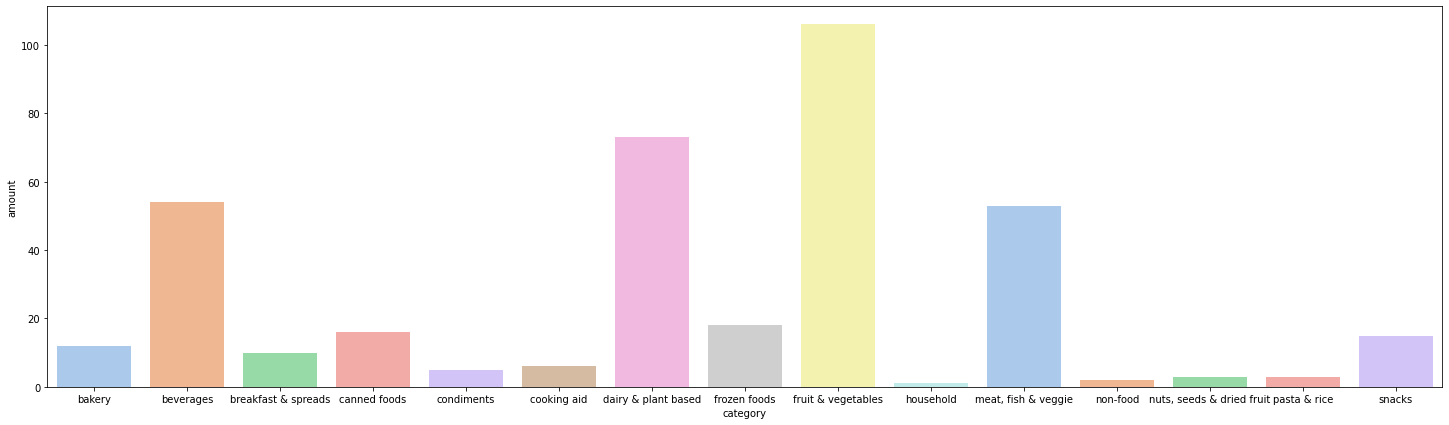

In [384]:
# barplot for store at this time

# I want to count the unique order id's = the amount of times they went
plt.figure(figsize=(25,7))
sns.barplot(x=category, y= amount, data=df_sum, palette="pastel")

In [385]:
true_count = df_sum.groupby('category').sum()

top_cat = true_count['amount'].nlargest(20)

top_cat

category
fruit & vegetables           106
dairy & plant based           73
beverages                     54
meat, fish & veggie           53
frozen foods                  18
canned foods                  16
snacks                        15
bakery                        12
breakfast & spreads           10
cooking aid                    6
condiments                     5
nuts, seeds & dried fruit      3
pasta & rice                   3
non-food                       2
household                      1
Name: amount, dtype: int64

### Category mapping

In [386]:
df_storetypemean = df_storetype.groupby(['day', 'week'])["order_amount"].agg(["mean"])
df_storetypemean = pd.DataFrame (df_storetypemean)
df_storetypemean = df_storetypemean.reset_index()
df_storetypemean

,day,week,mean
0,Friday,1,50.000000
1,Friday,8,1.000000
2,Monday,7,2.000000
3,Monday,8,24.285714
4,Saturday,1,31.000000
5,Saturday,6,38.000000
6,Saturday,8,9.000000
7,Sunday,3,2.000000
8,Sunday,4,34.000000
9,Sunday,7,34.000000


In [387]:
df_grouped = df.groupby(['day', 'day_num'])['day'].nunique()

df_grouped

day        day_num
Friday     4          1
Monday     0          1
Saturday   5          1
Sunday     6          1
Thursday   3          1
Tuesday    1          1
Wednesday  2          1
Name: day, dtype: int64

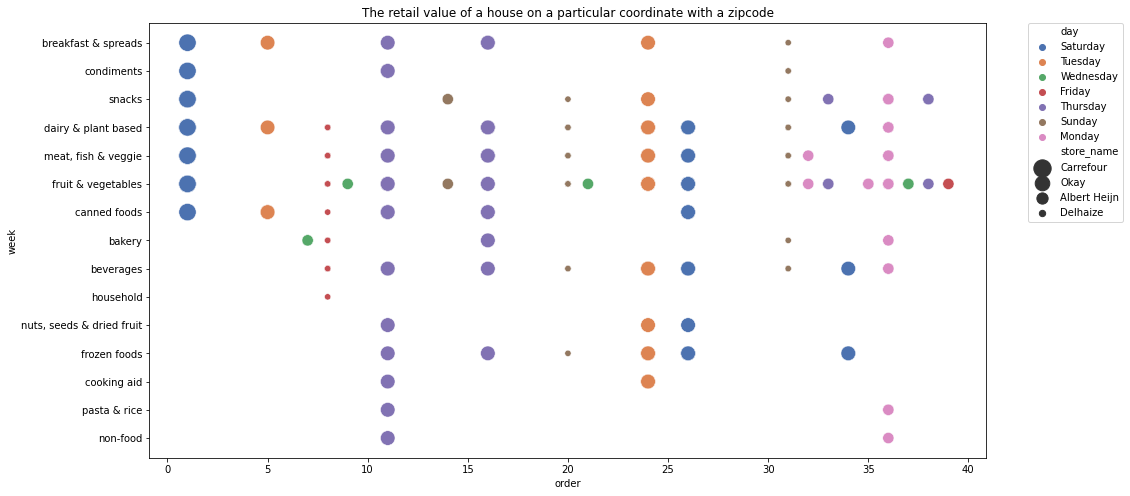

In [388]:
# select the x and y features
x = df_storetype["order_ID"]
y = df_storetype["category"]

# select the feature that decides the colors
colors = df_storetype["day"]

# select the feature that will decide the size of the circle (and divide the value by 1000 for reshaping in the plot)
size = df_storetype["store_name"]

# fit the points with the scatter function and add the colors
plt.figure(figsize=(15,8))
s = [20*2**n for n in range(len(x))]
sns.scatterplot(x=x,  sizes=(40, 300), y=y, palette="deep", size=size, hue=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# give the graph a title and labels
plt.xlabel("order")
plt.ylabel('week')
plt.title("The retail value of a house on a particular coordinate with a zipcode")

# call the graph (show function) and call the colorbar function for the legend
plt.grid(False)
plt.show()

## 3. Aggregating categories/revising categories

In [390]:
# to select only one store type (supermarket)
storetype_num = 4
df_storetype = df[df["storetype_num"] == storetype_num]
# df_storetype

In [391]:
df_storetype['category'].unique()

array(['breakfast & spreads', 'condiments', 'snacks',
       'dairy & plant based', 'meat, fish & veggie', 'fruit & vegetables',
       'canned foods', 'bakery', 'beverages', 'household',
       'nuts, seeds & dried fruit', 'frozen foods', 'cooking aid',
       'pasta & rice', 'non-food'], dtype=object)

### Finding appropriate correlations to recode categories

In [431]:
df_storetype['category']= df_storetype['category'].replace(['dairy & plant based', 'frozen foods', 'pasta & rice', 'non-food'], 'dairy, dry, frozen & non-food')
df_storetype['category']= df_storetype['category'].replace(['nuts, seeds & dried fruit', 'fruit & vegetables', 'snacks'], 'fruit/veggie, snacks & nuts')
df_storetype['category']= df_storetype['category'].replace(['breakfast & spreads', 'cooking aid', 'condiments', 'canned foods'], 'breakfast, condiment, canned & aid')
df_storetype['category']= df_storetype['category'].replace(['beverages', 'household', ], 'household & beverages')

C:\Users\20204113\AppData\Local\Temp/ipykernel_6520/1762858793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storetype['category']= df_storetype['category'].replace(['dairy & plant based', 'frozen foods', 'pasta & rice', 'non-food'], 'dairy, dry, frozen & non-food')
C:\Users\20204113\AppData\Local\Temp/ipykernel_6520/1762858793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storetype['category']= df_storetype['category'].replace(['nuts, seeds & dried fruit', 'fruit & vegetables', 'snacks'],

In [432]:
df_storetype['cat_num']=df_storetype['category'].astype('category').cat.codes

C:\Users\20204113\AppData\Local\Temp/ipykernel_6520/98398284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storetype['cat_num']=df_storetype['category'].astype('category').cat.codes


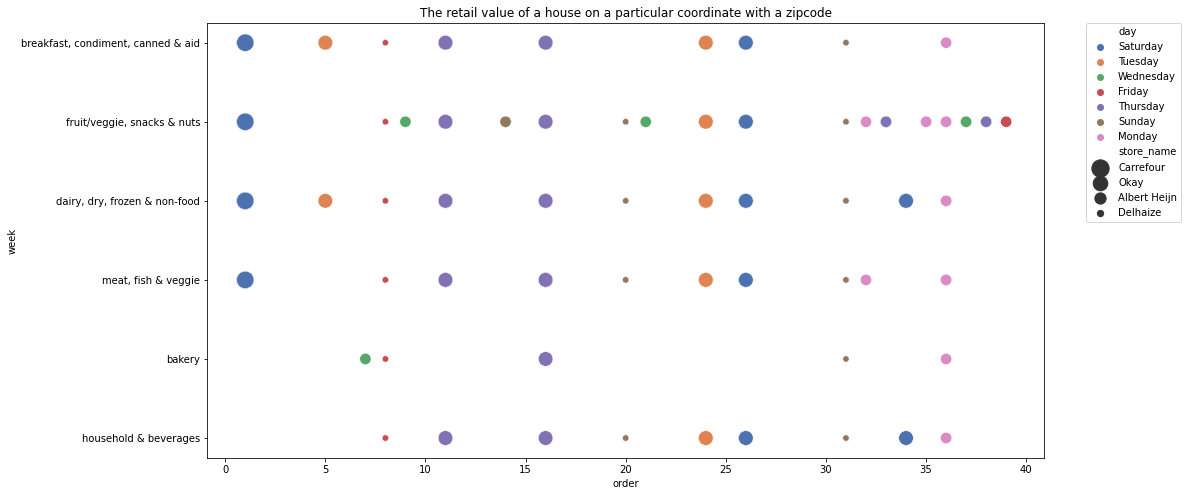

In [433]:
# select the x and y features
x = df_storetype["order_ID"]
y = df_storetype["category"]

# select the feature that decides the colors
colors = df_storetype["day"]

# select the feature that will decide the size of the circle (and divide the value by 1000 for reshaping in the plot)
size = df_storetype["store_name"]

# fit the points with the scatter function and add the colors
plt.figure(figsize=(15,8))
s = [20*2**n for n in range(len(x))]


sns.scatterplot(x=x,  sizes=(40, 300), y=y, palette="deep", size=size, hue=colors)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# give the graph a title and labels
plt.xlabel("order")
plt.ylabel('week')
plt.title("The retail value of a house on a particular coordinate with a zipcode")

# call the graph (show function) and call the colorbar function for the legend
plt.grid(False)
plt.show()

In [434]:
# grouping the variables based of unique order id count
df_sum = df_storetype.groupby(['category'])['amount'].sum()
df_sum = pd.DataFrame (df_sum)
df_sum = df_sum.reset_index()
df_sum

category = df_sum['category']
amount = df_sum['amount']

<AxesSubplot:xlabel='category', ylabel='amount'>

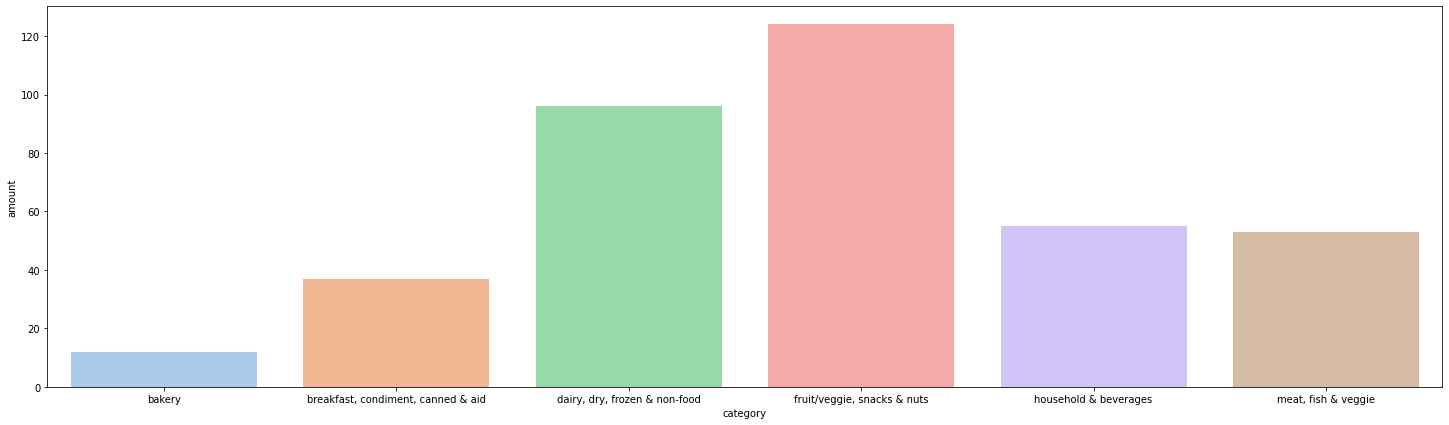

In [435]:
# barplot for store at this time

# I want to count the unique order id's = the amount of times they went
plt.figure(figsize=(25,7))
sns.barplot(x=category, y= amount, data=df_sum, palette="pastel")

### Categories per week (random)

In [437]:
# to select only one store category
cat = 'bakery'
df_category = df_storetype[df_storetype["category"] == cat]

In [438]:
# Creating a dataframe with 12,5% # values of original dataframe
part_1 = df_category.sample(frac = 0.125)
part_1

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
57,1,8,1X5 PITABROODJES,1,1.19,1.19,pita bread,bakery,Friday,afternoon,...,False,57,39,50,103.32998,4,4,3,0,0


In [439]:
# to select only one store category
cat = 'breakfast, condiment, canned & aid'
df_category = df_storetype[df_storetype["category"] == cat]

In [442]:
# Creating a dataframe with 12,5% # values of original dataframe
part_1 = df_category.sample(frac = 0.125)
part_1

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
116,2,11,EVERYDAY doperwt wortel zeer fijn 400g,2,0.79,1.58,peas and carrots,"breakfast, condiment, canned & aid",Thursday,afternoon,...,False,109,66,36,62.863083,3,4,6,0,1
341,8,36,AH MUESLI,1,1.79,1.79,muesli,"breakfast, condiment, canned & aid",Monday,evening,...,False,288,131,26,60.660000,0,4,0,1,1
114,2,11,EVERYDAY halve perzik siroop blik 820g,1,0.75,0.75,peaches,"breakfast, condiment, canned & aid",Thursday,afternoon,...,False,107,65,36,62.863083,3,4,6,0,1
0,1,1,CAR HAVERMOUT 800G,1,1.59,1.59,oatmeal,"breakfast, condiment, canned & aid",Saturday,evening,...,False,0,0,31,68.311420,5,4,2,1,1


In [443]:
# to select only one store category
cat = 'dairy, dry, frozen & non-food'
df_category = df_storetype[df_storetype["category"] == cat]

In [444]:
# Creating a dataframe with 12,5% # values of original dataframe
part_1 = df_category.sample(frac = 0.125)
part_1

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
265,6,26,MCCAIN country potatoes met kruiden 750g,1,3.29,3.29,frozen fries,"dairy, dry, frozen & non-food",Saturday,morning,...,False,199,113,38,96.788207,5,4,6,2,2
263,6,26,IGLO bloemkool met roomsaus 450g,1,3.89,3.89,cauliflower,"dairy, dry, frozen & non-food",Saturday,morning,...,True,226,85,38,96.788207,5,4,6,2,2
191,4,20,6 EIEREN ROLLIE,1,1.76,1.76,eggs,"dairy, dry, frozen & non-food",Sunday,morning,...,True,170,17,34,114.878340,6,4,3,2,2
3,1,1,CAR DR. AMANDEL 1L,1,1.49,1.49,almond milk,"dairy, dry, frozen & non-food",Saturday,evening,...,False,3,3,31,68.311420,5,4,2,1,2
264,6,26,BONI forestiere mix 1kg,1,3.49,3.49,frozen potatoes,"dairy, dry, frozen & non-food",Saturday,morning,...,False,227,112,38,96.788207,5,4,6,2,2
141,3,16,EVERYDAY dessert liégeois chocolade 200g,4,0.19,0.76,dessert,"dairy, dry, frozen & non-food",Thursday,evening,...,True,132,76,38,72.487014,3,4,6,1,2
226,5,24,"EVERYDAY paella royale 1,5kg",1,4.58,4.58,paella,"dairy, dry, frozen & non-food",Tuesday,morning,...,False,198,97,53,104.360960,1,4,6,2,2
211,5,24,BONI Gratin Mix geraspt 200g,1,1.39,1.39,cheese,"dairy, dry, frozen & non-food",Tuesday,morning,...,True,185,11,53,104.360960,1,4,6,2,2
335,8,34,BONI Pizza Rondo di Roma 450g,1,3.99,3.99,pizza,"dairy, dry, frozen & non-food",Saturday,afternoon,...,True,284,77,9,15.560000,5,4,6,0,2


In [451]:
# to select only one store category
cat = 'fruit/veggie, snacks & nuts'
df_category = df_storetype[df_storetype["category"] == cat]

In [452]:
# Creating a dataframe with 12,5% # values of original dataframe
part_1 = df_category.sample(frac = 0.125)
part_1

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
108,2,11,knolselder 1stuk,1,1.29000,1.29000,celeriac,"fruit/veggie, snacks & nuts",Thursday,afternoon,...,False,101,61,36,62.863083,3,4,6,0,3
359,8,36,MEXICAANSE CHILI PAKKET,1,4.99000,4.99000,vegetable box,"fruit/veggie, snacks & nuts",Monday,evening,...,True,304,132,26,60.660000,0,4,0,1,3
256,6,26,lenteuitjes bot,1,0.99000,0.99000,spring onions,"fruit/veggie, snacks & nuts",Saturday,morning,...,True,221,94,38,96.788207,5,4,6,2,3
241,5,24,witloof extra Flandria Los,1,0.36890,0.36890,chicory,"fruit/veggie, snacks & nuts",Tuesday,morning,...,True,212,73,53,104.360960,1,4,6,2,3
352,8,36,FRAMBOZEN,1,2.39000,2.39000,raspberries,"fruit/veggie, snacks & nuts",Monday,evening,...,True,278,90,26,60.660000,0,4,0,1,3
152,3,16,FLORETTE groentenmix Bordje Krokant 250g,1,1.69000,1.69000,vegetable mix,"fruit/veggie, snacks & nuts",Thursday,evening,...,True,104,62,38,72.487014,3,4,6,1,3
136,3,14,AH MLTSALADE,1,5.49000,5.49000,lunch salad,"fruit/veggie, snacks & nuts",Sunday,morning,...,True,94,58,2,6.080000,6,4,0,2,3
202,4,21,AHMAALTIJDSLA,1,5.49000,5.49000,lunch salad,"fruit/veggie, snacks & nuts",Wednesday,noon,...,True,180,58,1,5.490000,2,4,0,3,3
92,1,8,EETSINAASAP / BULK,1,1.55854,1.55854,oranges,"fruit/veggie, snacks & nuts",Friday,afternoon,...,False,89,55,50,103.329980,4,4,3,0,3
215,5,24,BONI pecannooten 200g,1,4.39000,4.39000,pecan nuts,"fruit/veggie, snacks & nuts",Tuesday,morning,...,False,188,93,53,104.360960,1,4,6,2,3


In [453]:
# to select only one store category
cat = 'household & beverages'
df_category = df_storetype[df_storetype["category"] == cat]

In [454]:
# Creating a dataframe with 12,5% # values of original dataframe
part_1 = df_category.sample(frac = 0.125)
part_1

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
230,5,24,ST BERNARDUS Abt 12 4x33cl,1,6.440,6.44,beer,household & beverages,Tuesday,morning,...,True,202,99,53,104.36096,1,4,6,2,4
65,1,8,CRODINO 8+2,1,4.490,4.49,alcoholic drinks,household & beverages,Friday,afternoon,...,False,64,42,50,103.32998,4,4,3,0,4
337,8,34,"BONI Iced Tea Peach niet-bruisend 0,5L",6,0.465,2.79,iced tea,household & beverages,Saturday,afternoon,...,True,229,78,9,15.56000,5,4,6,0,4


In [455]:
# to select only one store category
cat = 'meat, fish & veggie'
df_category = df_storetype[df_storetype["category"] == cat]

In [456]:
# Creating a dataframe with 12,5% # values of original dataframe
part_1 = df_category.sample(frac = 0.125)
part_1

,week,order_ID,item_name,amount,price_unit,price_total,item_type,category,day,time,...,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
4,1,1,DISC KABELJAUWFIL,1,5.790000,5.790000,fish,"meat, fish & veggie",Saturday,evening,...,False,4,4,31,68.311420,5,4,2,1,5
23,1,1,CV RIV KREEFTVL,1,4.990000,4.990000,fish spread,"meat, fish & veggie",Saturday,evening,...,False,23,19,31,68.311420,5,4,2,1,5
179,4,20,VERSNIJDIUNG DERDEN,1,15.610000,15.610000,charcuterie,"meat, fish & veggie",Sunday,morning,...,True,161,30,34,114.878340,6,4,3,2,5
84,1,8,Langoustine salade,1,2.857760,2.857760,fish spread,"meat, fish & veggie",Friday,afternoon,...,True,81,19,50,103.329980,4,4,3,0,5
161,3,16,OKAY Ardeens gehaktbrood 500g,1,5.846766,5.846766,charcuterie,"meat, fish & veggie",Thursday,evening,...,True,148,30,38,72.487014,3,4,6,1,5
145,3,16,WEIGHT WATCHERS kipfilet sneetjes 120g,1,2.350000,2.350000,charcuterie,"meat, fish & veggie",Thursday,evening,...,True,134,30,38,72.487014,3,4,6,1,5


In [189]:
# df_storetype.drop('cat_num', inplace=True, axis=1)

# # Recode categories
# def cat_to_numeric(x):
#     if x=='snacks & nuts': return 1
#     if x=='bread & breakfast':   return 2
#     if x=='beverages':   return 3
#     if x=='dairy & plant based':   return 4
#     if x=='non-food':   return 5
#     if x=='fruit & vegetables':   return 6
#     if x=='meat, fish & veggie':   return 7
#     if x=='pasta, rice & aid':   return 8
#     if x=='frozen & canned':   return 9
    
# df_storetype['cat_num'] = df_storetype['category'].apply(cat_to_numeric)

# # df_storetype.head()

In [404]:
# df_storetype['cat_num']=df_storetype['category'].astype('category').cat.codes
df_storetype.corr()

,week,order_ID,amount,price_unit,price_total,promo,reorder,item_id,type_id,order_amount,order_price,day_num,storetype_num,storename_num,time_num,cat_num
week,1.000000,0.983702,-0.016409,0.112095,0.089579,0.002368,0.284714,0.917017,0.460253,-0.324318,-0.123503,-0.183491,NaN,-0.166019,0.554984,0.016216
order_ID,0.983702,1.000000,-0.003002,0.118899,0.103421,0.022537,0.316333,0.931327,0.481496,-0.266310,-0.082416,-0.231043,NaN,-0.138303,0.515919,0.029354
amount,-0.016409,-0.003002,1.000000,-0.183128,0.174357,-0.041720,-0.011155,-0.016501,0.048790,0.057958,0.005756,-0.072080,NaN,0.164164,-0.001919,-0.030900
price_unit,0.112095,0.118899,-0.183128,1.000000,0.905590,0.202501,0.101978,0.092154,-0.023073,-0.088989,-0.001229,0.043568,NaN,-0.038396,0.176697,0.389501
price_total,0.089579,0.103421,0.174357,0.905590,1.000000,0.202375,0.081710,0.068202,-0.003580,-0.070576,0.017320,0.034855,NaN,0.029888,0.190305,0.344237
promo,0.002368,0.022537,-0.041720,0.202501,0.202375,1.000000,0.025633,0.012045,0.063919,-0.248900,-0.164371,-0.011404,NaN,-0.209478,0.126569,0.100004
reorder,0.284714,0.316333,-0.011155,0.101978,0.081710,0.025633,1.000000,0.239862,-0.397654,-0.022192,0.037169,-0.016508,NaN,0.040825,0.113274,0.235873
item_id,0.917017,0.931327,-0.016501,0.092154,0.068202,0.012045,0.239862,1.000000,0.511500,-0.234660,-0.071330,-0.227157,NaN,-0.132351,0.446874,0.039878
type_id,0.460253,0.481496,0.048790,-0.023073,-0.003580,0.063919,-0.397654,0.511500,1.000000,-0.111389,-0.049788,-0.192401,NaN,-0.022437,0.236889,-0.143014
order_amount,-0.324318,-0.266310,0.057958,-0.088989,-0.070576,-0.248900,-0.022192,-0.234660,-0.111389,1.000000,0.849783,0.039785,NaN,0.499516,-0.373753,0.104313


<AxesSubplot:xlabel='category', ylabel='amount'>

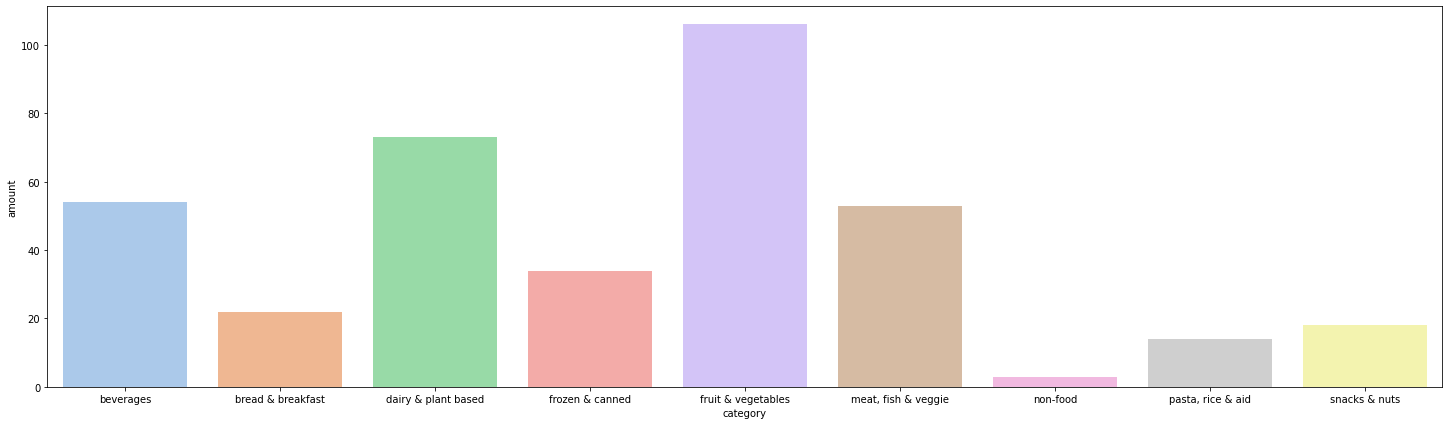

In [191]:
# barplot for store at this time

# grouping the variables based of unique order id count
df_sum = df_storetype.groupby(['category'])['amount'].sum()
df_sum = pd.DataFrame (df_sum)
df_sum = df_sum.reset_index()
df_sum

category = df_sum['category']
amount = df_sum['amount']

# I want to count the unique order id's = the amount of times they went
plt.figure(figsize=(25,7))
sns.barplot(x=category, y= amount, data=df_sum, palette="pastel")

## At what time & day for each store name?

#### Carrefour

In [192]:
# to select only one certain store - Carrefour
storename_num = 1
df_store1 = df[df["storename_num"] == storename_num]

# check if you selected correctly
# df_store1.head()

In [193]:
# grouping the variables based of unique order id count
df_nunique = df_store1.groupby(['day', 'time', 'week'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

,day,time,week,order_ID
0,Saturday,evening,1,1


<AxesSubplot:xlabel='day', ylabel='count'>

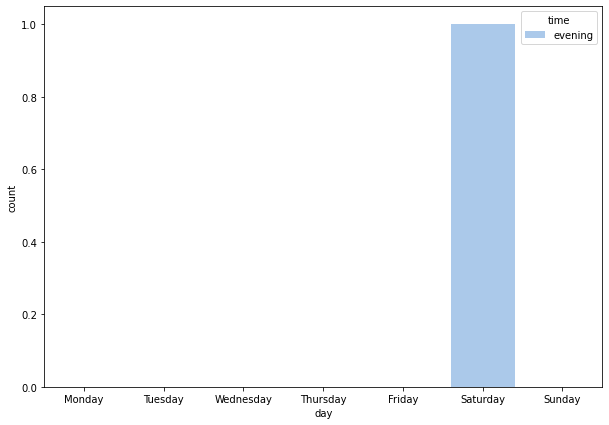

In [457]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store1.groupby(['day', 'time', 'week'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']


# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [195]:
# grouping the variables based of unique order id count
df_nunique = df_store1.groupby(['day', 'time', 'week'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

        day     time  week  order_ID
0  Saturday  evening     1         1
        day     time  week  order_ID
0  Saturday  evening     1         1
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []
Empty DataFrame
Columns: [day, time, week, order_ID]
Index: []


Text(0.5, 1.0, 'week 1')

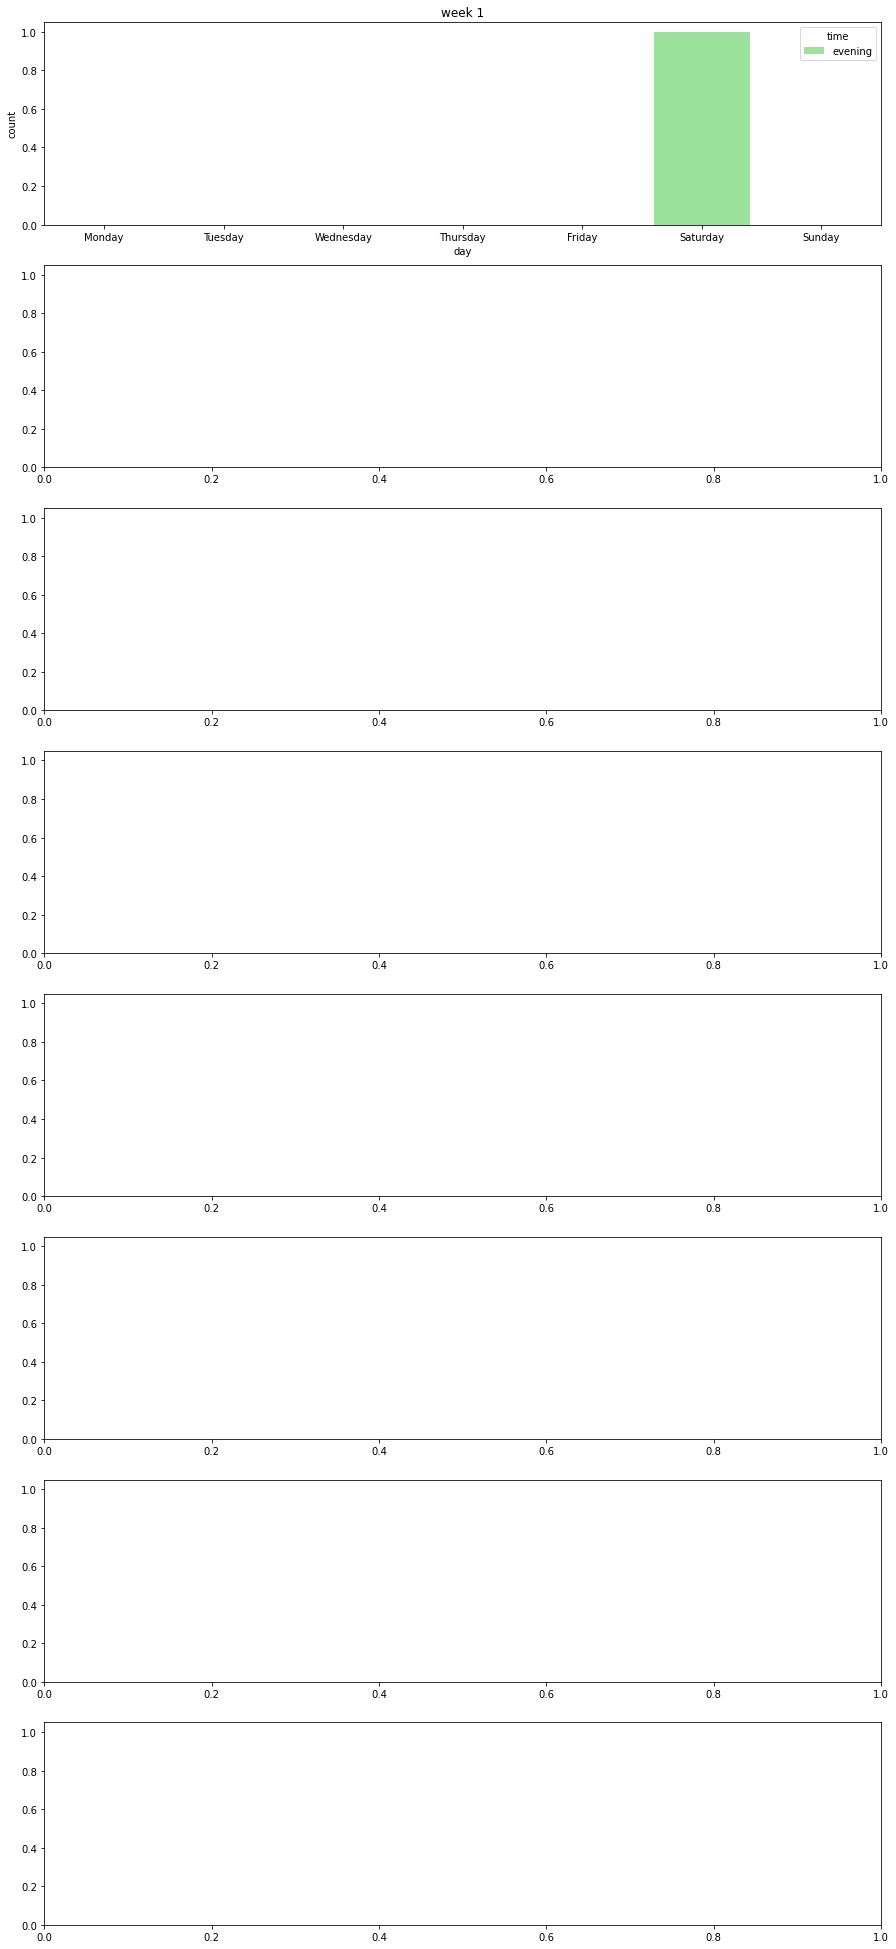

In [196]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# week 1
sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
ax[0].set_title('week 1')

# # week 2
# sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
# ax[1].set_title('week 2')

# # week 3
# sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
# ax[2].set_title('week 3')

# # week 4
# sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
# ax[3].set_title('week 4')

# week 5
# sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
# ax[4].set_title('week 5')

# # week 6
# sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
# ax[5].set_title('week 6')

# # week 7
# sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
# ax[6].set_title('week 7')

# # week 8
# sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
# ax[7].set_title('week 8')

#### Okay

In [197]:
# to select only one certain store
storename_num = 2
df_store2 = df[df["storename_num"] == storename_num]


# check if you selected correctly
# df_store2

In [198]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store2.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']


# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

KeyError: 'Column not found: order_id'

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store2.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# week 1
sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
ax[0].set_title('week 1')

# week 2
sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
ax[1].set_title('week 2')

# week 3
sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
ax[2].set_title('week 3')

# week 4
# sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
# ax[3].set_title('week 4')

# # week 5
sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
ax[4].set_title('week 5')

# # week 6
sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
ax[5].set_title('week 6')

# # week 7
# sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
# ax[6].set_title('week 7')

# # week 8
sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
ax[7].set_title('week 8')

#### Albert Heijn

In [ ]:
# to select only one certain store
storename_num = 3
df_store3 = df[df["storename_num"] == storename_num]


# check if you selected correctly
# df_store3.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store3.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']


# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store3.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# week 1
sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
ax[0].set_title('week 1')

# week 2
sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
ax[1].set_title('week 2')

# week 3
sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
ax[2].set_title('week 3')

# week 4
sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
ax[3].set_title('week 4')

# # week 5
# sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
# ax[4].set_title('week 5')

# # week 6
# sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
# ax[5].set_title('week 6')

# # week 7
sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
ax[6].set_title('week 7')

# # week 8
sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
ax[7].set_title('week 8')

#### DELHAIZE

In [ ]:
# to select only one certain store
storename_num = 4
df_store4 = df[df["storename_num"] == storename_num]

# check if you selected correctly
# df_store4.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store4.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']

# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store4.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# week 1
sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
ax[0].set_title('week 1')

# # week 2
# sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
# ax[1].set_title('week 2')

# # week 3
# sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
# ax[2].set_title('week 3')

# week 4
day4 = df_week4['day']
count4 = df_week4['order_id']
hue4 = df_week4['time']

sns.barplot(ax=ax[3],x=day4, y=count4, hue=hue4, order=order, data=df_week4)
ax[3].set_title('week 4')

# # week 5
# sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
# ax[4].set_title('week 5')

# # week 6
# sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
# ax[5].set_title('week 6')

# week 7
sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
ax[6].set_title('week 7')

# # week 8
# day8 = df_week8['day']
# count8 = df_week8['order_id']
# hue8 = df_week8['time']

# sns.barplot(ax=ax[7],x=day8, y=count8, hue=hue8, order=order, data=df_week8)
# ax[7].set_title('week 8')

#### Sys

In [ ]:
# to select only one certain store
storename_num = 5
df_store5 = df[df["storename_num"] == storename_num]


# check if you selected correctly
# df_store5.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store5.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']

# creating the bar plot
# plt.figure(figsize=(10,6))

# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store5.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# week 1
day1 = df_week1['day']
count1 = df_week1['order_id']
hue1 = df_week1['time']

sns.barplot(ax=ax[0],x=day1, y=count1, hue=hue1, order=order, data=df_week1)
ax[0].set_title('week 1')

# week 2
sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
ax[1].set_title('week 2')

# week 3
day3 = df_week3['day']
count3 = df_week3['order_id']
hue3 = df_week3['time']

sns.barplot(ax=ax[2],x=day3, y=count3, hue=hue3, order=order, data=df_week3)
ax[2].set_title('week 3')

# week 4
sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
ax[3].set_title('week 4')

# week 5
sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
ax[4].set_title('week 5')

# week 6
sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
ax[5].set_title('week 6')

# week 7
sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
ax[6].set_title('week 7')

# # week 8
# sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
# ax[7].set_title('week 8')

#### Brabo

In [ ]:
# to select only one certain store
storename_num = 6
df_store6 = df[df["storename_num"] == storename_num]


# check if you selected correctly
# df_store6.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store6.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']

# creating the bar plot
# plt.figure(figsize=(10,6))

# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store6.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# # week 1
# sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
# ax[0].set_title('week 1')

# week 2
sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
ax[1].set_title('week 2')

# # week 3
# sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
# ax[2].set_title('week 3')

# # week 4
# sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
# ax[3].set_title('week 4')

# # week 5
# sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
# ax[4].set_title('week 5')

# # week 6
# sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
# ax[5].set_title('week 6')

# # week 7
# sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
# ax[6].set_title('week 7')

# # week 8
# sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
# ax[7].set_title('week 8')

#### Versavel Poelman

In [ ]:
# to select only one certain store
storename_num = 7
df_store7 = df[df["storename_num"] == storename_num]


# check if you selected correctly
df_store7.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store7.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']

# creating the bar plot
# plt.figure(figsize=(10,6))

# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store7.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# week 1
sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
ax[0].set_title('week 1')

# # week 2
# sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
# ax[1].set_title('week 2')

# # week 3
# sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
# ax[2].set_title('week 3')

# # week 4
# sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
# ax[3].set_title('week 4')

# week 5
sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
ax[4].set_title('week 5')

# week 6
sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
ax[5].set_title('week 6')

# # week 7
# sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
# ax[6].set_title('week 7')

# # week 8
# sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
# ax[7].set_title('week 8')

#### Ikea

In [ ]:
# to select only one certain store
storename_num = 8
df_store8 = df[df["storename_num"] == storename_num]


# check if you selected correctly
df_store8.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store8.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']

# creating the bar plot
# plt.figure(figsize=(10,6))

# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store8.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# # week 1
# sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
# ax[0].set_title('week 1')

# # week 2
# sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
# ax[1].set_title('week 2')

# week 3
sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
ax[2].set_title('week 3')

# # week 4
# sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
# ax[3].set_title('week 4')

# # week 5
# sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
# ax[4].set_title('week 5')

# # week 6
# sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
# ax[5].set_title('week 6')

# # week 7
# sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
# ax[6].set_title('week 7')

# # week 8
# sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
# ax[7].set_title('week 8')

#### Kruidvat

In [ ]:
# to select only one certain store
storename_num = 9
df_store9 = df[df["storename_num"] == storename_num]


# check if you selected correctly
df_store9.head()

In [ ]:
# barplot for day & time when HH1 will go to this store

# grouping the variables based of unique order id count
df_nunique = df_store9.groupby(['day', 'time'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique

# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df_nunique['day']
time = df_nunique['time']

# creating the bar plot
# plt.figure(figsize=(10,6))

# make barplot and sort bars 
# I want to count the unique order id's = the amount of times they went
# sns.barplot(x='day', y= 'order_id', hue = 'time',data=df_nunique,order=order)
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x=day, hue=time, palette="pastel", order=order, data=df_nunique)

In [ ]:
# grouping the variables based of unique order id count
df_nunique = df_store9.groupby(['day', 'time', 'week'])['order_id'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
print(df_nunique)

# df for week 1
df_week1 = df_nunique[df_nunique["week"] == 1]
print(df_week1)

# df for week 2
df_week2 = df_nunique[df_nunique["week"] == 2]
print(df_week2)

# df for week 3
df_week3 = df_nunique[df_nunique["week"] == 3]
print(df_week3)

# df for week 4
df_week4 = df_nunique[df_nunique["week"] == 4]
print(df_week4)

# df for week 5
df_week5 = df_nunique[df_nunique["week"] == 5]
print(df_week5)

# df for week 6
df_week6 = df_nunique[df_nunique["week"] == 6]
print(df_week6)

# df for week 7
df_week7 = df_nunique[df_nunique["week"] == 7]
print(df_week7)

# df for week 8
df_week8 = df_nunique[df_nunique["week"] == 8]
print(df_week8)

In [ ]:
# setting the values 
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
palette= {'morning': 'blue', 'noon':'lightblue', 'afternoon': 'green', 'evening' : 'lightgreen'}

# Creating subplots per week
countplt, ax = plt.subplots(8, 1, figsize=(15, 35), sharey=True)

# # week 1
# sns.countplot(ax=ax[0], x=df_week1['day'], hue=df_week1['time'], palette= palette, order=order, data=df_week1)
# ax[0].set_title('week 1')

# # week 2
# sns.countplot(ax=ax[1],x=df_week2['day'], hue=df_week2['time'], palette= palette, order=order, data=df_week2)
# ax[1].set_title('week 2')

# # week 3
# sns.countplot(ax=ax[2],x=df_week3['day'], hue=df_week3['time'], palette= palette, order=order, data=df_week3)
# ax[2].set_title('week 3')

# # week 4
# sns.countplot(ax=ax[3],x=df_week4['day'], hue=df_week4['time'], palette= palette, order=order, data=df_week4)
# ax[3].set_title('week 4')

# # week 5
# sns.countplot(ax=ax[4],x=df_week5['day'], hue=df_week5['time'], palette= palette, order=order, data=df_week5)
# ax[4].set_title('week 5')

# week 6
sns.countplot(ax=ax[5],x=df_week6['day'], hue=df_week6['time'], palette= palette, order=order, data=df_week6)
ax[5].set_title('week 6')

# # week 7
# sns.countplot(ax=ax[6],x=df_week7['day'], hue=df_week7['time'], palette= palette, order=order, data=df_week7)
# ax[6].set_title('week 7')

# # week 8
# sns.countplot(ax=ax[7],x=df_week8['day'], hue=df_week8['time'], palette= palette, order=order, data=df_week8)
# ax[7].set_title('week 8')

## How many times per week do they go grocery shopping?

In [ ]:
df.head()

#### In total

In [ ]:
count = df.groupby('week')['order_id'].nunique()
df_count = pd.DataFrame(count)
df_count = df_count.reset_index()
print(df_count)
print(f"mean orders per week = {df_count['order_id'].mean()}") 

#### In supermarket

In [ ]:
df_supermarket = df.loc[df['store_type'] == 'supermarket']
count = df_supermarket.groupby('week')['order_id'].nunique()
df_count = pd.DataFrame(count)
df_count = df_count.reset_index()
print(df_count)
print(f"mean orders per week = {df_count['order_id'].mean()}") 

#### In bakery

In [ ]:
df_bakery = df.loc[df['store_type'] == 'bakery']
count = df_bakery.groupby('week')['order_id'].nunique()
df_count = pd.DataFrame(count)
df_count = df_count.reset_index()
# print(df_count)

## First add rows for empty weeks (total = 8 weeks)
df2 = pd.DataFrame({"week":[8],
                    "order_id":[0]})
  
# appending df2 at the end of df_count
df_count = df_count.append(df2, ignore_index = True)
print(df_count)

print(f"mean orders per week = {df_count['order_id'].mean()}") 

#### In butcher's

In [ ]:
df_butcher = df.loc[df['store_type'] == 'butcher']
count = df_butcher.groupby('week')['order_id'].nunique()
df_count = pd.DataFrame(count)
df_count = df_count.reset_index()
# print(df_count)

## First add rows for empty weeks (total = 8 weeks)
df2 = pd.DataFrame({"week":[3, 4, 7, 8],
                    "order_id":[0,0,0,0]})
  
# appending df2 at the end of df_count
df_count = df_count.append(df2, ignore_index = True)
print(df_count)

print(f"mean orders per week = {df_count['order_id'].mean()}") 

#### In furniture store

In [ ]:
df_furniture = df.loc[df['store_type'] == 'furniture store']
count = df_furniture.groupby('week')['order_id'].nunique()
df_count = pd.DataFrame(count)
df_count = df_count.reset_index()
print(df_count) 

print(f"mean orders per week = {df_count['order_id'].mean()}") 

#### In drugstore

In [ ]:
df_drugstore = df.loc[df['store_type'] == 'drugstore']
count = df_drugstore.groupby('week')['order_id'].nunique()
df_count = pd.DataFrame(count)
df_count = df_count.reset_index()
print(df_count) 